## 1. CompressSensing class

CompressSesing class provides tools to read wav signal, build periodic signal multi-frequency, compress it with random sampling and recovered it with L1-minimimazation solver

In [42]:
from signal_frame import *
from l1min import *

## 2. Periodic signal

### 2.1. Une seule fréquence

In [43]:
sf = SignalFrame()

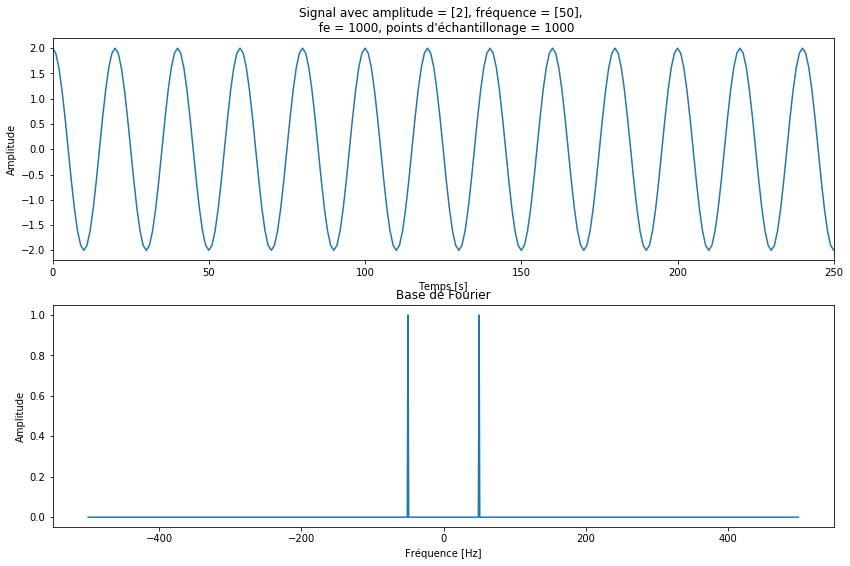

In [44]:
cos1 = sf.signal_gen(a0=[2], f0=[50], fe=1000, t=1, noise_level=0, plot=True)

In [45]:
cos1.sampler_gauss(signal_length=1, rate=0.2)

signal_sampled = cos1.temporal_sampled
phi = cos1.phi

Sampling performed : 200 instants


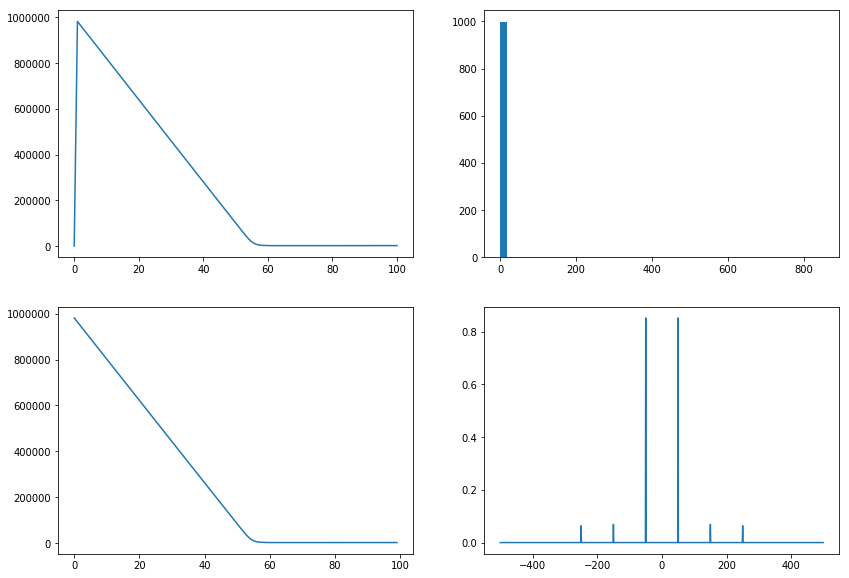

In [53]:
l1 = L1min()
cos1_recovered = l1.solver(signal_sampled, phi, w=18, plot_result=True)

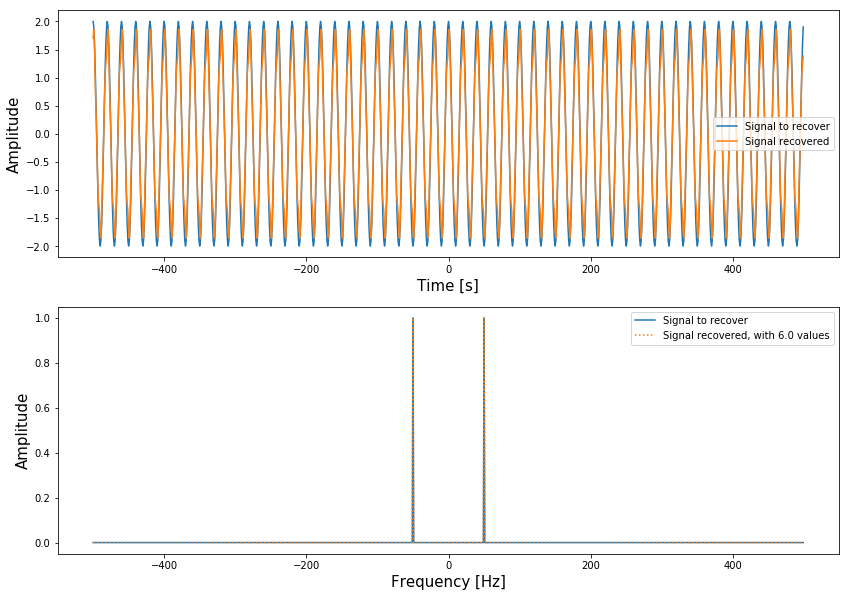

In [54]:
l1.plot_score(cos1.temporal, cos1_recovered)

(0, 200)

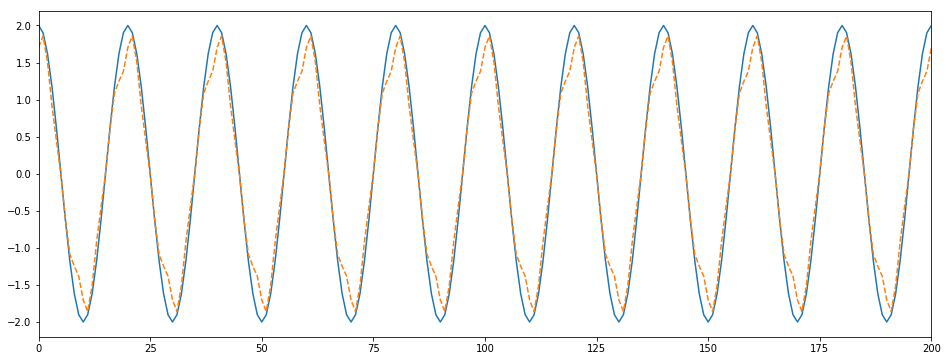

In [55]:
from scipy.fftpack import ifftshift

plt.figure(figsize=(16,6))
plt.plot(cos1.temporal)
plt.plot(ifft(ifftshift(cos1_recovered)), '--')
plt.xlim([0,200])

### 2.2. Signal périodique composé de 5 fréquences sans bruit

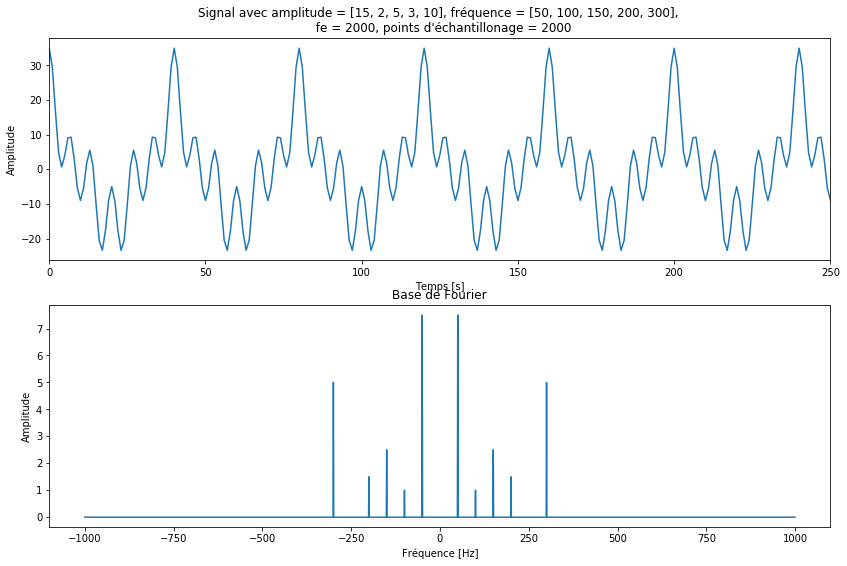

In [8]:
sf = SignalFrame()

A = [15, 2, 5, 3, 10]
f = [50, 100, 150, 200, 300]

cos2 = sf.signal_gen(a0=A, f0=f, fe=2000, t=1, noise_level=0, plot=True)

In [9]:
cos2.sampler_gauss(signal_length=1, rate=0.2)

signal_sampled = cos2.temporal_sampled
phi = cos2.phi

Sampling performed : 400 instants


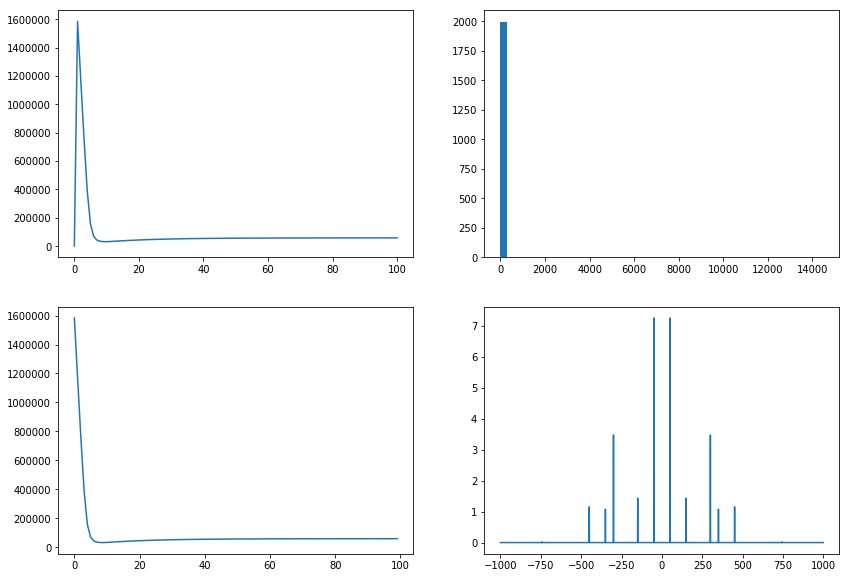

In [10]:
l1 = L1min()

cos2_recovered = l1.solver(signal_sampled, phi, w=208, plot_result=True)

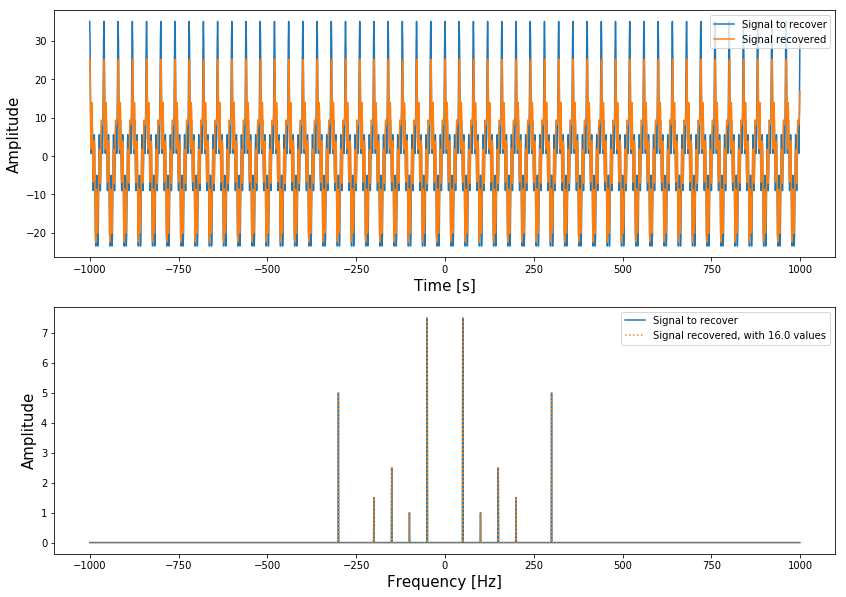

In [11]:
l1.plot_score(cos2.temporal, cos2_recovered)

(0, 120)

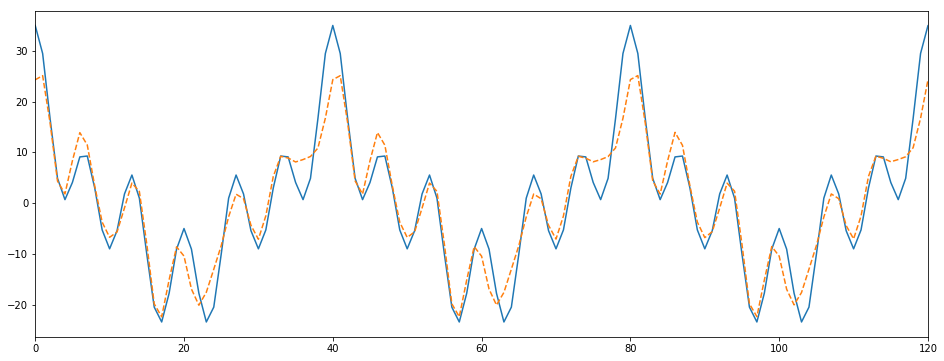

In [12]:
plt.figure(figsize=(16,6))
plt.plot(cos2.temporal)
plt.plot(ifft(ifftshift(cos2_recovered)), '--')
plt.xlim([0,120])

### 2.2. Signal périodique composé de 5 fréquences avec bruit

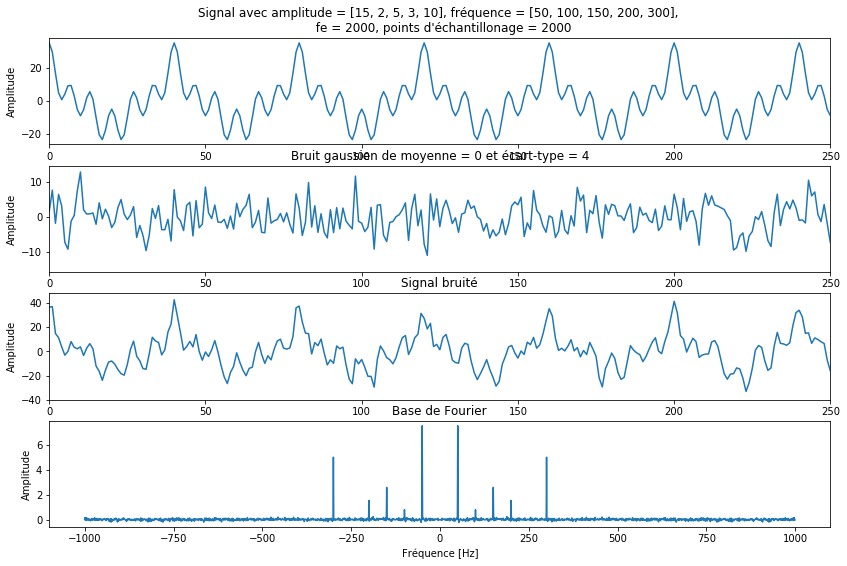

In [13]:
sf = SignalFrame()

A = [15, 2, 5, 3, 10]
f = [50, 100, 150, 200, 300]

cos3 = sf.signal_gen(a0=A, f0=f, fe=2000, t=1, noise_level=2, plot=True)

In [14]:
cos3.sampler_gauss(signal_length=1, rate=0.5, verbose=0)

signal_sampled = cos3.temporal_sampled
phi = cos3.phi

Sampling performed : 1000 instants


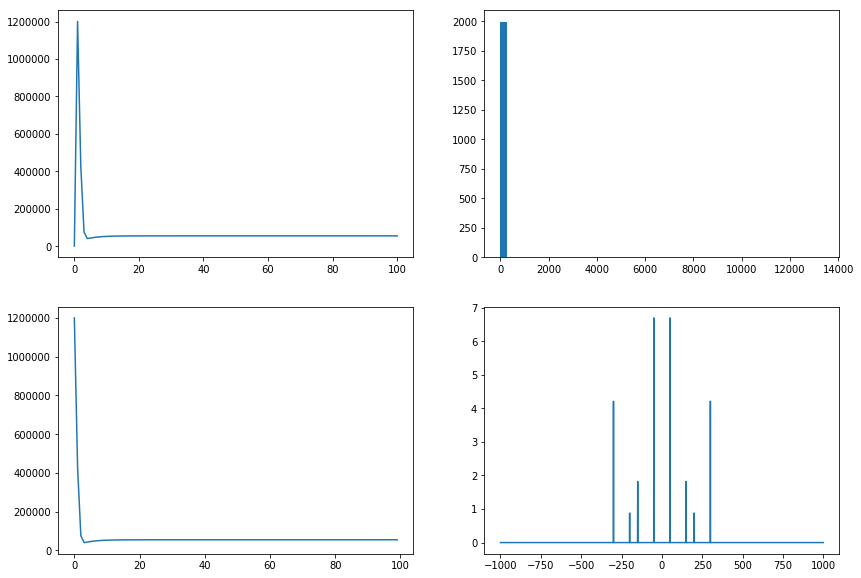

In [15]:
l1 = L1min()

cos3_recovered = l1.solver(signal_sampled, phi, w=400, plot_result=True)

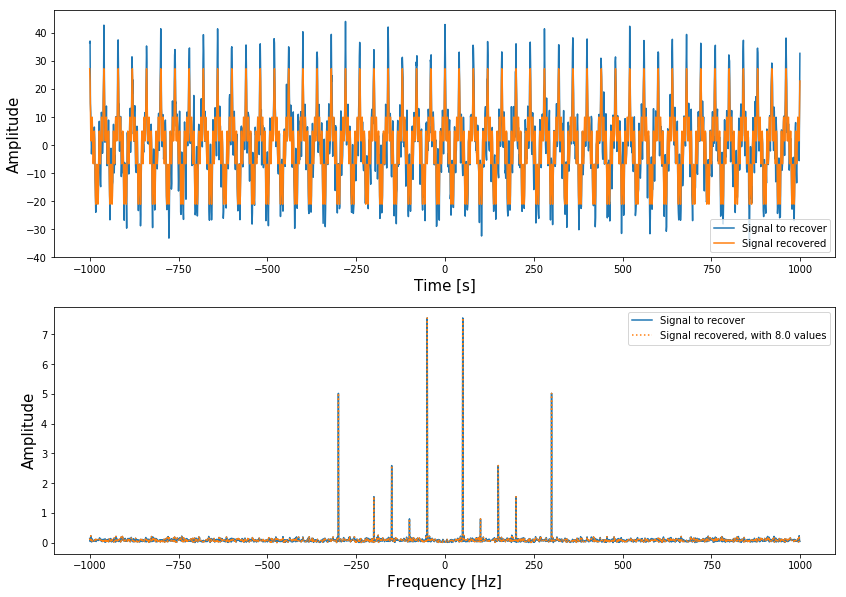

In [16]:
l1.plot_score(cos3.temporal, cos3_recovered)

(0, 200)

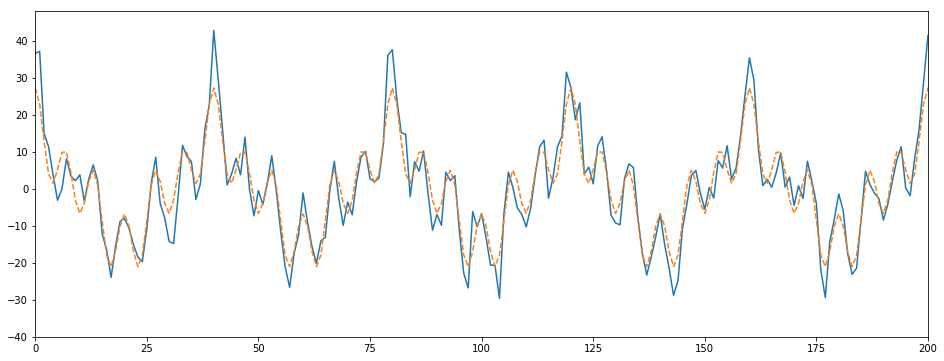

In [17]:
plt.figure(figsize=(16,6))
plt.plot(cos3.temporal)
plt.plot(ifft(ifftshift(cos3_recovered)), '--')
plt.xlim([0,200])

## 3.  Signal measured

In [18]:
sf = SignalFrame()
s01 = sf.read_wave('../signals_wav/C_01.wav')

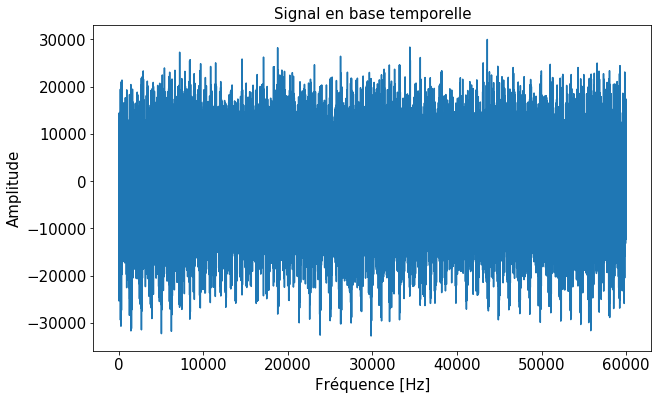

In [19]:
s01.plot(basis='temporal')

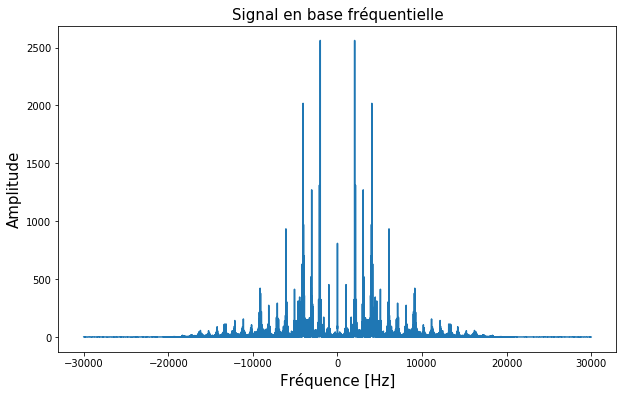

In [20]:
s01.fft()
s01.plot(basis='freq')

In [25]:
s01.sampler_gauss(rate=0.3, signal_length=0.3)

signal_sampled = s01.temporal_sampled
phi = s01.phi

Sampling performed : 6000 instants


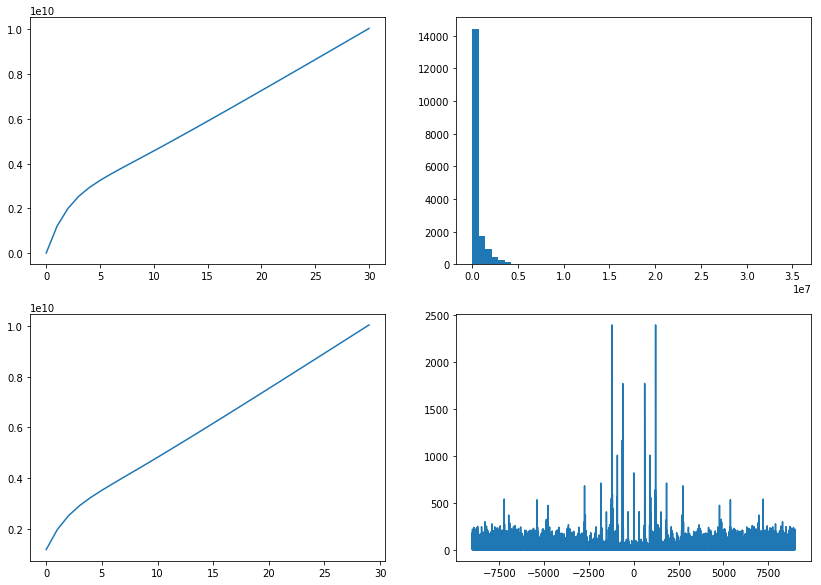

In [35]:
l1 = L1min()

s01_recovered = l1.solver(signal_sampled, phi, w=150000, max_iter=30, plot_result=True)

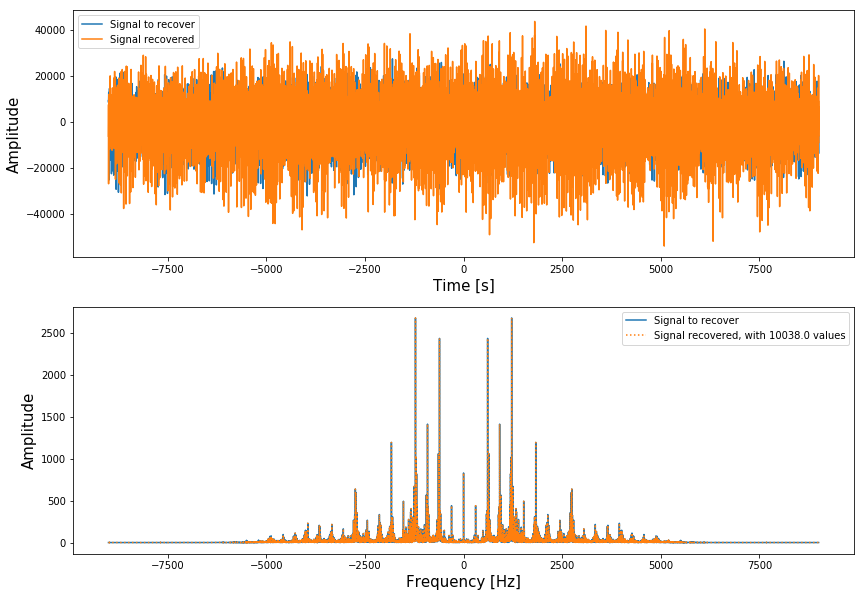

In [36]:
l1.plot_score(s01.temporal, s01_recovered)

(0, 300)

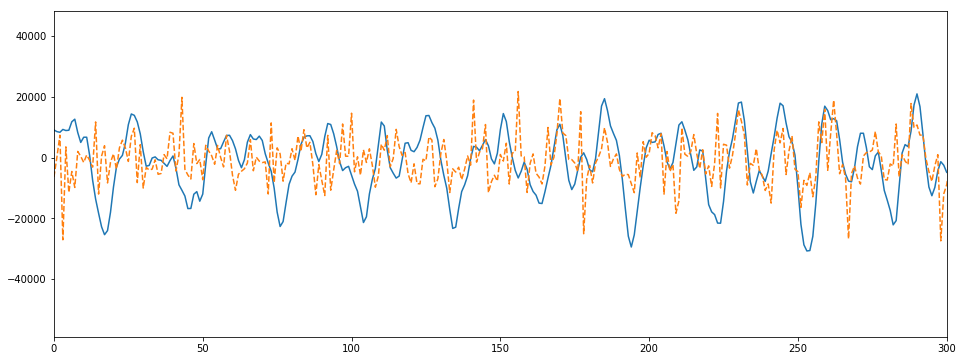

In [38]:
plt.figure(figsize=(16,6))
plt.plot(s01.temporal)
plt.plot(ifft(ifftshift(s01_recovered)), '--')
plt.xlim([0,300])